In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/UNdata_Export_20230915_035336592.csv')
first10rows = gdp_df.head(10)
last10rows = gdp_df.tail(10)
print(first10rows)
print(last10rows)

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
5     Afghanistan  2015  2068.265904              NaN
6     Afghanistan  2014  2102.384604              NaN
7     Afghanistan  2013  2116.465258              NaN
8     Afghanistan  2012  2075.491614              NaN
9     Afghanistan  2011  1904.559926              NaN
     Country or Area  Year        Value  Value Footnotes
7166        Zimbabwe  1999  2872.714795              NaN
7167        Zimbabwe  1998  2915.052992              NaN
7168        Zimbabwe  1997  2856.118188              NaN
7169        Zimbabwe  1996  2808.558556              NaN
7170        Zimbabwe  1995  2573.993785              NaN
7171        Zimbabwe  1994  2603.927369              NaN
7172   

In [3]:
gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

In [4]:
print(gdp_df.shape)
print(gdp_df.info())

#Could also be:
#print(gdp_df.dtypes)

(7176, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB
None


Answer to question 6:
gdp_df now has 7176 rows and 3 columns.
Country column is an object, Year is an integer ("int64"), and GDP_Per_Capita is a float ("float64" - number with a decimal).

In [5]:
gdp_df.groupby(['Year']).count()

,Country,GDP_Per_Capita
Year,,
1990,206,206
1991,207,207
1992,208,208
1993,209,209
1994,211,211
1995,222,222
1996,222,222
1997,226,226
1998,226,226


Answers to question 7:
The years 1990-2020 are represented in this dataset.

The number of observations per year generally increases gradually over time (with the exception of the 2 most recent years: 2019 & 2020 - one might wonder if those years are still waiting for updates).

In [6]:
countrycount = gdp_df.groupby(['Country']).count().sort_values('Year',ascending=True)
print(countrycount.shape)
print(countrycount.head(20))

#Could also be:
#print(f'There are {gdp_df.Country.nunique()} countries in the GDP dataset.')
#gdp_df['Country'].value_counts(ascending = True)

(242, 2)
                           Year  GDP_Per_Capita
Country                                        
Somalia                       8               8
Djibouti                      8               8
Turks and Caicos Islands     10              10
Sint Maarten (Dutch part)    10              10
Kosovo                       13              13
Cayman Islands               15              15
Nauru                        17              17
Afghanistan                  19              19
SÃ£o TomÃ© and Principe      20              20
Timor-Leste                  21              21
CuraÃ§ao                     21              21
Liberia                      21              21
Qatar                        21              21
Palau                        21              21
Other small states           21              21
Libya                        22              22
Montenegro                   24              24
San Marino                   24              24
Small states                 24

Answers to question 8:
There are 242 countries in the data set.
Countries least represented in the dataset generally follow 2 patterns:

1) They are war zones in Africa or the Middle East (Somalian and Libyan civil wars, war on terror affecting Afghanistan and Qatar, Djibouti has significant US military bases to address African and Middle Eastern conflicts... etc.)

2) They are really small countries - especially island countries like Nauru. One of the 242 "countries" with the least representation is literally just listed as "other small states".

In [7]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]

#Could also be:
#gdp_2014 = gdp_df.query('Year == 2014').reset_index().drop(columns = 'index')
#or
#gdp_2014 = gdp_df.query('Year == 2014').reset_index(drop = True)

gdp_2014.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714572
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874687
75%,2014.0,26461.384188
max,2014.0,155201.740571


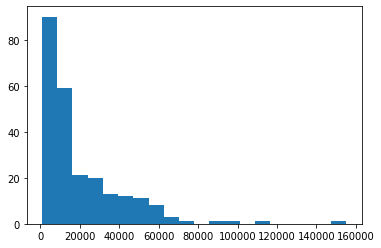

In [8]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins = 20);

#Another example:
#plt.hist(gdp_2014['GDP_Per_Capita'],np.arange(0, 170000, 10000));

#semicolon at the end of plt statement makes plt.show() unnecessary!
#plt.show()

Answer to question 11:
This is a very right-skewed distribution - there are only a few countries over $50,000 GDP/Capita while the majority are below that value.

In [9]:
gdp_2018 = gdp_df[gdp_df['Year']==2018].sort_values('GDP_Per_Capita',ascending = False)

#Could also do:
#gdp_df[gdp_df['Year']==2018].nlargest(5,'GDP_Per_Capita')
#gdp_df[gdp_df['Year']==2018].nsmallest(5,'GDP_Per_Capita')

print(gdp_2018.head())
print("")
print(gdp_2018.tail())

               Country  Year  GDP_Per_Capita
3915  Macao SAR, China  2018   132373.544079
3884        Luxembourg  2018   115049.926079
5722         Singapore  2018    98336.956494
5383             Qatar  2018    90970.060902
3073           Ireland  2018    83726.362961

                       Country  Year  GDP_Per_Capita
4752                     Niger  2018     1200.402348
5873                   Somalia  2018     1129.531464
1526           Dem. Rep. Congo  2018     1085.893688
1138  Central African Republic  2018      933.109951
916                    Burundi  2018      761.524143


Answer to question 12:
Macao, Luxembourg, Singapore, Qatar, and Ireland have the highest GDP/Capita
Burundi, CAR, DRC, Somalia, and Niger have the lowest GDP/Capita

In [10]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')
gdp_pivoted = gdp_pivoted.dropna(subset=[1990, 2018])

#Could also do:
#gdp_pivoted = gdp_df.loc[gdp_df['Year'].isin([1990, 2018])].pivot_table('GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()
#gdp_pivoted.head()

In [11]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2018]-gdp_pivoted[1990])/gdp_pivoted[1990]
gdp_pivoted[gdp_pivoted['Percent_Change']<0].sort_values('Percent_Change')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Dem. Rep. Congo,1819.723315,1606.326694,1382.761987,1150.836230,1066.468172,1039.752865,1000.689174,921.422433,885.785895,828.209256,...,926.787816,972.455934,1029.790813,1065.242371,1055.572915,1059.810762,1085.893688,1097.948840,1082.445242,-40.326440
United Arab Emirates,111454.055665,106103.552655,103470.924576,98978.474614,100213.156226,101570.992100,102211.638844,105108.996265,100100.435658,97698.537395,...,57389.318786,59920.152313,62452.184508,65267.415127,66510.893666,67183.605312,66968.221181,68263.675535,63299.422971,-39.914056
Burundi,1184.842032,1215.887215,1202.106321,1105.228711,1044.716092,947.822231,861.482899,839.196865,870.043821,850.046951,...,862.715651,877.272857,886.235296,825.205574,794.604340,773.572859,761.524143,751.443405,731.064074,-35.727791
Ukraine,16428.480469,14967.733398,13447.164062,11531.298828,8934.775391,7906.957031,7179.677734,7028.046387,6956.398926,7008.243652,...,12985.086914,13020.600586,12385.813477,11216.118164,11536.316406,11860.560547,12336.926758,12804.955078,12407.790039,-24.905247
Congo,5068.286948,5049.206077,5040.357668,4854.626404,4461.657639,4510.633104,4571.971362,4414.313537,4448.409191,4209.771602,...,5504.184956,5331.904082,5552.844606,5224.302467,4544.075841,4234.659883,3928.427999,3825.701480,3497.565454,-22.490024
Central African Republic,1201.674665,1165.240259,1060.638246,1033.830959,1053.745934,1098.894561,1027.650038,1055.257751,1078.453826,1091.360827,...,1300.288810,824.943276,822.611195,852.749237,884.495197,912.803045,933.109951,946.059657,937.856470,-22.349203
Gabon,18179.170002,18770.603732,17704.526465,17917.219193,18099.395717,18514.567979,18703.166651,19284.530176,19465.245278,17297.806005,...,15082.656561,15342.181310,15437.265029,15510.038951,15359.740396,15006.844037,14743.698243,14945.859294,14320.844646,-18.897847
Tajikistan,4092.148779,3719.371003,2591.871631,2131.619060,1652.224201,1425.582163,1169.945378,1172.170092,1216.220057,1242.198818,...,2637.194886,2767.354769,2883.697905,2984.518548,3113.257637,3252.932655,3415.299465,3581.409187,3654.072934,-16.540193
Brunei,71232.789430,71405.378117,72705.728039,70908.808194,71176.341934,72446.901629,72695.152114,69939.977176,67986.138352,68540.820930,...,69090.341493,66715.692648,64190.824147,63147.483490,60867.291866,60994.531556,60389.184647,62098.011380,62200.882043,-15.222772


Answer to question 15:
17 countries experienced negative GDP growth from 1990 to 2018.

Country
Equatorial Guinea                              1860.221820
China                                           962.857956
Myanmar                                         691.854635
East Asia & Pacific (excluding high income)     527.796116
East Asia & Pacific (IDA & IBRD)                527.522835
Name: Percent_Change, dtype: float64


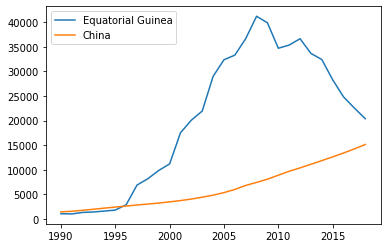

In [12]:
print(gdp_pivoted.sort_values('Percent_Change',ascending=False).head()['Percent_Change'])
plt.plot(gdp_pivoted.loc['Equatorial Guinea'].loc[1990:2018])
plt.plot(gdp_pivoted.loc['China'].loc[1990:2018])
plt.legend(['Equatorial Guinea','China'])
plt.show()

Answers to question 16:
Equatorial Guinea had the highest % GDP/Capita growth from 1990 to 2018.
China had the 2nd highest % GDP/Capita growth from 1990 to 2018.

China had a much more steady growth rate whereas Equatorial Guinea had an inconsistent but seemingly exponential growth rate up until ~2017, at which point Equatorial Guinea's % GDP/Capita growth began to rapidly decline.

In [13]:
continents = pd.read_csv('../data/continents.csv')
gdp_df=continents.merge(gdp_df,how='inner')
print(gdp_df.head())

  Continent      Country  Year  GDP_Per_Capita
0      Asia  Afghanistan  2020     1970.560169
1      Asia  Afghanistan  2019     2065.036235
2      Asia  Afghanistan  2018     2033.804389
3      Asia  Afghanistan  2017     2058.400221
4      Asia  Afghanistan  2016     2057.067978


Continent
Africa           50
Asia             42
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


<BarContainer object of 6 artists>

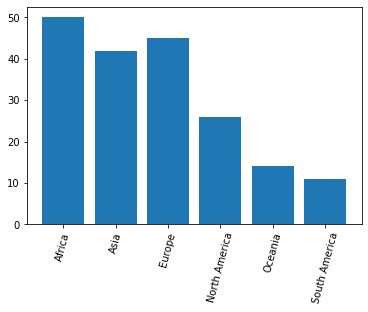

In [14]:
print(gdp_df.groupby('Continent')['Country'].nunique())
#gdp_df.groupby('Continent')['Country'].nunique().reset_index() would give data frame using numbered indexes and 2 columns (continent and num)
#gdp_df.groupby('Continent')['Country'].nunique().plot.bar()
plt.xticks(rotation=75)
plt.bar(gdp_df.groupby('Continent')['Country'].nunique().index,gdp_df.groupby('Continent')['Country'].nunique())

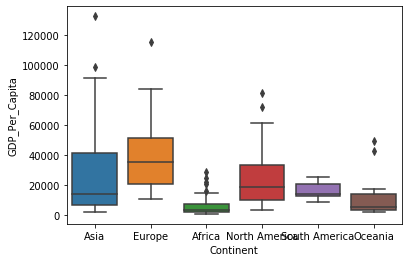

In [37]:
sns.boxplot(data=gdp_df[gdp_df['Year']==2018],x='Continent',y='GDP_Per_Capita');

Answers to question 20:
There's a lot I could comment on with this boxplot, and I'm not sure any one observation stands out among the rest.

Europe has the highest median GDP/capita. Africa has the lowest median.

Asia has the widest distribution of GDP/capita - its poor countries are really poor, and its rich countries are really rich.

All continents' distribution of GDP/capita appears to be right-skewed - there are a few extremely rich countries bringing up the mean while the median remains low. This is less exaggerated in South America than in other continents.

In [16]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_5839536.csv',skiprows=[0,2])
life_expectancy=(life_expectancy
                 .drop(columns=["Country Code","Indicator Name", "Indicator Code"])
                 .melt(id_vars="Country Name",var_name='Year', value_name='Life_Expectancy')
                 .rename(columns = {"Country Name":"Country"})
                )
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000


In [17]:
print(life_expectancy[life_expectancy['Life_Expectancy']>80].iloc[0])
#Could also be:
#life_expectancy[life_expectancy['Life_Expectancy']>80].sort_values(by='Year').head()

Country                Japan
Year                    1996
Life_Expectancy    80.219756
Name: 9695, dtype: object


Answer to Question 23:
Japan was the first country with a life expectancy to exceed 80, and they acheived this in 1996.

In [18]:
'''
Lots of difficulties merging gdp_df and life_expectancy because 'Year' is an int in gdp_df but a string in life_expectancy.
'Year' is a string in life_expectancy because of rows that contain 'Unnamed:67'.
This is addressed in the rows below, where I:
1) check the data types in both data frames
2) delete rows in life_expectancy's year column that contain 'Unnamed: 67'
3) convert the remainder of that column to an int
4) check that it was actually converted to an int.
'''
print(type(gdp_df['Year'].iloc[0]))
print(type(life_expectancy['Year'].iloc[0]))
life_expectancy=life_expectancy[life_expectancy['Year'] != 'Unnamed: 67']
life_expectancy['Year']=life_expectancy['Year'].astype(np.int64)
print(type(life_expectancy['Year'].iloc[0]))
#This line ends the aformentioned conversion of life_expectancy's year column from string to int.

gdp_le = life_expectancy.merge(gdp_df,how='inner',on=["Country","Year"])
print(gdp_le.head())
print(gdp_le.tail())

<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
                Country  Year  Life_Expectancy      Continent  GDP_Per_Capita
0                 Aruba  1990           73.076  North America    32589.018572
1                Angola  1990           41.893         Africa     5758.950488
2               Albania  1990           73.144         Europe     4827.034551
3  United Arab Emirates  1990           71.900           Asia   111454.055665
4             Argentina  1990           71.784  South America    14144.763670
           Country  Year  Life_Expectancy Continent  GDP_Per_Capita
5236         Samoa  2020           72.768   Oceania     6413.330111
5237        Kosovo  2020           76.567    Europe    10706.513976
5238  South Africa  2020           65.252    Africa    12665.832404
5239        Zambia  2020           62.380    Africa     3277.816510
5240      Zimbabwe  2020           61.124    Africa     2134.555461


In [19]:
gdp_le_2019=gdp_le[gdp_le['Year'] == 2019]
print(gdp_le_2019[gdp_le_2019['Life_Expectancy']>=80].count())
#could also be:
#gdp_le_2019[gdp_le_2019['Life_Expectancy']>=80].nunique()

Country            34
Year               34
Life_Expectancy    34
Continent          34
GDP_Per_Capita     34
dtype: int64


Answer to question 25:
34 countries had a life expectancy of at least 80 in 2019.

Answer to question 26 below:

4983    Macao SAR, China
4981          Luxembourg
5028           Singapore
Name: Country, dtype: object


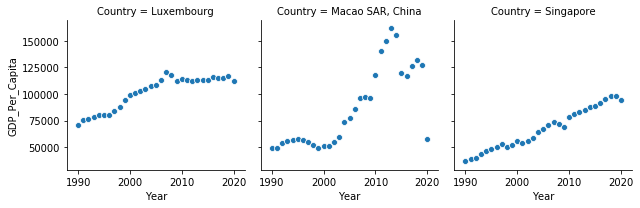

In [38]:
gdp_le_2019 = gdp_le_2019.sort_values('GDP_Per_Capita',ascending=False)
print(gdp_le_2019['Country'][0:3])
#print(gdp_le[(gdp_le['Country'] == 'Macao SAR, China') | (gdp_le['Country'] == 'Luxembourg') | (gdp_le['Country'] == 'Singapore')])
facetload = sns.FacetGrid(data=gdp_le[(gdp_le['Country'] == 'Macao SAR, China') | (gdp_le['Country'] == 'Luxembourg') | (gdp_le['Country'] == 'Singapore')], col = 'Country')
facetload.map(sns.scatterplot, 'Year','GDP_Per_Capita');

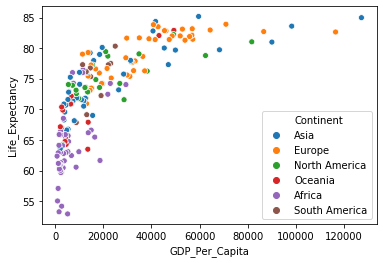

In [40]:
#Question 27: Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?
sns.scatterplot(data=gdp_le_2019, x= 'GDP_Per_Capita', y='Life_Expectancy', hue='Continent');

#Could also use:
#plt.scatter(x=gdp_le_2019['GDP_Per_Capita'], y=gdp_le_2019['Life_Expectancy'])

Answer to question 27:

In general, as GDP per capita increases, life expectancy increases, but it increases as a decreasing rate (i.e. countries with really high GDP per capita don't have significantly higher life expectancy than countries with median GDP per capita, but median GDP per capita countries have much higher life expectancy than the poorest countries).

In [22]:
#Question 28: Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?
r = gdp_le_2019[['Life_Expectancy','GDP_Per_Capita']].corr()['Life_Expectancy']['GDP_Per_Capita']
print('r = ' + str(r))
print('R^2 = ' + str(r**2))

r = 0.7261468254863799
R^2 = 0.5272892121639471


Answer to question 28:
This correlation coefficient of 0.726 between Life Expectancy and GDP Per Capita in 2019 is a numerical metric of the extent of a linear relationship for these 2 variables. 

The R^2 value of 0.527 is another common way of measuring this relationship, but it is not technically the correlation coefficient by definition. 

These numbers and the scatter plot from before indicate to me that these variables do not have a strong linear relationship. Based on the graph from before, I do think they likely are related - just not linearly.

r = 0.8627345814622118
R^2 = 0.7443109580507778


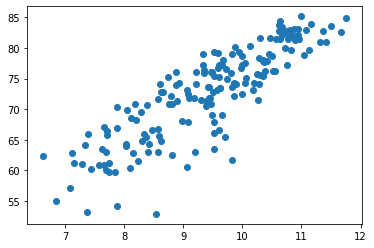

In [23]:
#Question 29: Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.
gdp_le_2019['log_gdp']= np.log(gdp_le_2019['GDP_Per_Capita'])
r = gdp_le_2019[['Life_Expectancy','log_gdp']].corr()['Life_Expectancy']['log_gdp']
print('r = ' + str(r))
print('R^2 = ' + str(r**2))
plt.scatter(x=gdp_le_2019['log_gdp'], y=gdp_le_2019['Life_Expectancy']);

Answers to question 29:
The correlation coefficient, r = 0.863, is much higher than it was before the log transformation. This also leads to a higher R^2 value of 0.744.
This indicates that life expectancy in 2019 has a much stronger linear relationship with the log of GDP per capita than just GDP per capita alone. The scatter plot of life expectancy vs. the log transformed GDP per capita also indicates a strong linear relationship than before the log transformation.